<a href="https://colab.research.google.com/github/Kenethoriga/soccer-match-prediction/blob/main/soccer_match_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests

# API Football endpoint and key
API_KEY = 'a9f89bbe8d05560e0ebb73c76bf2604f'
BASE_URL = 'https://api-football-v1.p.rapidapi.com/v3/'

# Function to fetch matches for a specific league and season
def get_matches(league_id, season_year):
    headers = {
        "x-rapidapi-host": "api-football-v1.p.rapidapi.com",
        "x-rapidapi-key": API_KEY
    }
    params = {
        'league': league_id,
        'season': season_year
    }
    response = requests.get(f"{BASE_URL}fixtures", headers=headers, params=params)
    if response.status_code == 200:
        return response.json().get('response', [])
    else:
        print(f"Error fetching matches: {response.status_code}")
        return []

# Example usage
matches = get_matches(league_id=4, season_year=2024)  # Euro Championship 2024
for match in matches:
    print(match['fixture']['date'], match['teams']['home']['name'], 'vs', match['teams']['away']['name'])

Error fetching matches: 403


In [11]:
import requests
import json
import pandas as pd
import os  # To use environment variables (secure API keys)

# Define API connection
url = "https://v3.football.api-sports.io/leagues"

# Secure API Key (replace with os.environ["API_KEY"] in production)
API_KEY = "a9f89bbe8d05560e0ebb73c76bf2604f"

headers = {
    "x-apisports-key": API_KEY,
    "x-apisports-host": "v3.football.api-sports.io"
}

# Send request
response = requests.get(url, headers=headers)

# Check if request is successful
if response.status_code == 200:
    data = response.json()

    # Extract league details
    leagues = []
    for league in data.get('response', []):  # Use .get() to avoid KeyErrors
        league_id = league.get('league', {}).get('id', None)
        league_name = league.get('league', {}).get('name', "Unknown League")
        country_name = league.get('country', {}).get('name', "Unknown Country")
        league_type = league.get('league', {}).get('type', "Unknown Type")

        # Extract seasons safely
        seasons = league.get('seasons', [])
        formatted_seasons = [season.get('year') for season in seasons]  # Extract only year

        leagues.append([
            league_id, league_name, country_name, formatted_seasons, league_type
        ])

    # Create DataFrame
    df = pd.DataFrame(leagues, columns=["League ID", "League Name", "Country", "Seasons", "Type"])

    # Display DataFrame
    print(df)

else:
    print(f"Error {response.status_code}: {response.text}")


      League ID                                     League Name  Country  \
0             4                               Euro Championship    World   
1            21                              Confederations Cup    World   
2            61                                         Ligue 1   France   
3           144                              Jupiler Pro League  Belgium   
4            71                                         Serie A   Brazil   
...         ...                                             ...      ...   
1166       1146                                    Alagoano - 2   Brazil   
1167       1148                                  Maranhense - 2   Brazil   
1168       1083       UEFA Championship - Women - Qualification    World   
1169       1169  EAFF E-1 Football Championship - Qualification    World   
1170       1147                                      Capixaba B   Brazil   

                                                Seasons    Type  
0                    

First row of 'seasons': [2008, 2012, 2016, 2020, 2024]
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4974 - loss: 0.6937 - val_accuracy: 0.4511 - val_loss: 0.6946
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5221 - loss: 0.6925 - val_accuracy: 0.5106 - val_loss: 0.6936
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5350 - loss: 0.6917 - val_accuracy: 0.4128 - val_loss: 0.6969
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5158 - loss: 0.6922 - val_accuracy: 0.4085 - val_loss: 0.6965
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5284 - loss: 0.6909 - val_accuracy: 0.4638 - val_loss: 0.6950
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4994 - loss: 0.6933 - val_accuracy: 0.5319 - val_loss: 0.6931
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5187 - loss: 0.6921 - val_accuracy: 0.4213 - val_loss: 0.6964
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5440 - loss: 0.6914 - val_accuracy: 0.5234 - val_loss: 0.6936
Ep

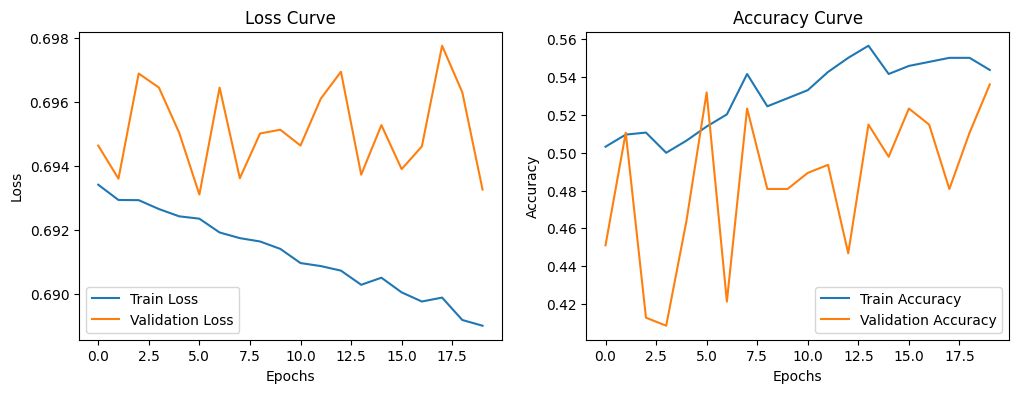

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
🔹 XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       138
           1       0.45      0.52      0.48        97

    accuracy                           0.54       235
   macro avg       0.54      0.54      0.53       235
weighted avg       0.55      0.54      0.54       235


🔹 LSTM Model Performance:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       138
           1       0.45      0.52      0.48        97

    accuracy                           0.54       235
   macro avg       0.53      0.53      0.53       235
weighted avg       0.55      0.54      0.54       235

       start        end
0 2008-01-01 2024-12-31
1 2009-01-01 2017-12-31
2 2010-01-01 2024-12-31
3 2010-01-01 2024-12-31
4 2010-01-01 2024-12-31


In [30]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import joblib  # For saving the XGBoost model

# Ensure df is already loaded
print("First row of 'seasons':", df['Seasons'].iloc[0])

# Extract start and end year
df['start'] = pd.to_datetime(df['Seasons'].apply(lambda x: f"{min(x)}-01-01" if isinstance(x, list) and len(x) > 0 else None))
df['end'] = pd.to_datetime(df['Seasons'].apply(lambda x: f"{max(x)}-12-31" if isinstance(x, list) and len(x) > 0 else None))

# 🔹 Generate synthetic features (replace with actual data)
np.random.seed(42)
df['team_strength'] = np.random.rand(len(df)) * 10
df['recent_form'] = np.random.rand(len(df)) * 5
df['home_away_advantage'] = np.random.choice([0, 1], size=len(df))

# 🔹 Generate match outcomes (replace with actual labels)
df['match_outcome'] = np.random.choice([0, 1], size=len(df))

# Define features and labels
features = ['team_strength', 'recent_form', 'home_away_advantage']
labels = 'match_outcome'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[labels], test_size=0.2, random_state=42)

# ✅ Train and Save XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train.values.ravel())  # Ensure labels are 1D
joblib.dump(xgb_model, "xgb_model.pkl")  # Save the model

# ✅ Prepare LSTM input (reshape for time-series)
n_timesteps = 1  # Adjust if you have sequential data
n_features = len(features)

X_train_lstm = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_lstm = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))

# ✅ Define LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train and Save LSTM Model
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test_lstm, y_test),
    callbacks=[early_stopping]
)

lstm_model.save("lstm_model.h5")  # Save the model

# ✅ Visualizing Training Performance
plt.figure(figsize=(12, 4))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

# ✅ Test Model Predictions
xgb_pred = xgb_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test_lstm).round()

# ✅ Classification Reports
print("🔹 XGBoost Model Performance:")
print(classification_report(y_test, xgb_pred))

print("\n🔹 LSTM Model Performance:")
print(classification_report(y_test, lstm_pred))

# ✅ Check DataFrame Output
print(df[['start', 'end']].head())


In [35]:
import joblib
lstm_model.save("lstm_model.h5")

joblib.dump(xgb_model, "xgb_model.pkl")

from google.colab import files

# Download LSTM model
files.download("lstm_model.h5")

# Download XGBoost model
files.download("xgb_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
predictions = loaded_lstm.predict(X_test_lstm)
predictions = (predictions > 0.5).astype(int)  # Convert to binary labels


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


In [14]:
def over_0_5_first_half_goals(match_data):
    """
    Checks if the first half had more than 0.5 goals.
    Returns True if at least 1 goal was scored in the first half.
    """
    first_half_goals = match_data.get('score', {}).get('halftime', {})
    total_goals = first_half_goals.get('home', 0) + first_half_goals.get('away', 0)
    return total_goals > 0


def over_1_5_goals_full_match(match_data):
    """
    Checks if the full match had more than 1.5 goals.
    Returns True if total goals exceed 1.5.
    """
    full_time_goals = match_data.get('score', {}).get('fulltime', {})
    total_goals = full_time_goals.get('home', 0) + full_time_goals.get('away', 0)
    return total_goals > 1.5


def btts(match_data):
    """
    Checks if both teams scored at least one goal (Both Teams To Score - BTTS).
    Returns True if both home and away teams scored.
    """
    full_time_goals = match_data.get('score', {}).get('fulltime', {})
    return full_time_goals.get('home', 0) > 0 and full_time_goals.get('away', 0) > 0


# 🔹 Example match data structure
example_match = {
    "score": {
        "halftime": {"home": 1, "away": 0},
        "fulltime": {"home": 2, "away": 1}
    }
}

# 🔹 Test the functions
print(over_0_5_first_half_goals(example_match))  # ✅ Expected: True
print(over_1_5_goals_full_match(example_match))  # ✅ Expected: True
print(btts(example_match))                        # ✅ Expected: True


True
True
True


In [29]:
import requests

API_KEY = "192c0b0d2a90031c1e1faa531fd33d85"  # Replace with your actual API key

# List of football leagues (sport keys)
leagues = [
    "soccer_argentina_primera_division",
    "soccer_australia_aleague",
    "soccer_austria_bundesliga",
    "soccer_belgium_first_div",
    "soccer_chile_campeonato",
    "soccer_conmebol_copa_libertadores",
    "soccer_denmark_superliga",
    "soccer_efl_champ",
    "soccer_england_efl_cup",
    "soccer_england_league1",
    "soccer_england_league2",
    "soccer_epl",
    "soccer_fa_cup",
    "soccer_fifa_world_cup_winner",
    "soccer_france_ligue_one",
    "soccer_france_ligue_two",
    "soccer_germany_bundesliga",
    "soccer_germany_bundesliga2",
    "soccer_germany_liga3",
    "soccer_greece_super_league",
    "soccer_italy_serie_a",
    "soccer_italy_serie_b",
    "soccer_japan_j_league",
    "soccer_korea_kleague1",
    "soccer_league_of_ireland",
    "soccer_mexico_ligamx",
    "soccer_netherlands_eredivisie",
    "soccer_norway_eliteserien",
    "soccer_poland_ekstraklasa",
    "soccer_portugal_primeira_liga",
    "soccer_spain_la_liga",
    "soccer_spain_segunda_division",
    "soccer_spl",
    "soccer_sweden_allsvenskan",
    "soccer_switzerland_superleague",
    "soccer_turkey_super_league",
    "soccer_uefa_champs_league",
    "soccer_uefa_europa_conference_league",
    "soccer_uefa_europa_league"
]

regions = "uk,eu,us"  # Specify regions to fetch odds fro

regions = "uk,eu"  # Specify the regions you're interested in
markets = "h2h"  # Betting market (head-to-head odds)
odds_format = "decimal"
date_format = "iso"

for league in leagues:
    odds_url = f"https://api.the-odds-api.com/v4/sports/{league}/odds/"
    params = {
        "apiKey": API_KEY,
        "regions": regions,
        "markets": markets,
        "oddsFormat": odds_format,
        "dateFormat": date_format,
    }

    response = requests.get(odds_url, params=params)

    if response.status_code == 200:
        odds_data = response.json()
        print(f"\n📢 Odds for {league.replace('soccer_', '').upper()}:\n")

        if not odds_data:
            print("⚠️ No odds available for this league.")
            continue

        for event in odds_data:
            print(f"⚽ Match: {event['home_team']} vs {event['away_team']}")
            for bookmaker in event.get('bookmakers', []):
                print(f"🏦 Bookmaker: {bookmaker['title']}")
                for market in bookmaker.get('markets', []):
                    for outcome in market.get('outcomes', []):
                        print(f"   🎲 {outcome['name']}: {outcome['price']}")
    else:
        print(f"❌ Error fetching odds for {league}: {response.status_code} - {response.text}")



Streaming output truncated to the last 5000 lines.
🏦 Bookmaker: Suprabets
   🎲 Hearts: 1.82
   🎲 St Johnstone: 4.6
   🎲 Draw: 3.55

📢 Odds for SWEDEN_ALLSVENSKAN:

⚽ Match: GAIS vs AIK
🏦 Bookmaker: Virgin Bet
   🎲 AIK: 2.35
   🎲 GAIS: 2.85
   🎲 Draw: 3.25
🏦 Bookmaker: Unibet
   🎲 AIK: 2.4
   🎲 GAIS: 2.9
   🎲 Draw: 3.35
🏦 Bookmaker: LeoVegas
   🎲 AIK: 2.32
   🎲 GAIS: 2.75
   🎲 Draw: 3.2
🏦 Bookmaker: Grosvenor
   🎲 AIK: 2.38
   🎲 GAIS: 2.85
   🎲 Draw: 3.3
🏦 Bookmaker: Unibet
   🎲 AIK: 2.4
   🎲 GAIS: 2.9
   🎲 Draw: 3.35
🏦 Bookmaker: Casumo
   🎲 AIK: 2.4
   🎲 GAIS: 2.9
   🎲 Draw: 3.35
🏦 Bookmaker: LiveScore Bet
   🎲 AIK: 2.35
   🎲 GAIS: 2.85
   🎲 Draw: 3.25
🏦 Bookmaker: Betsson
   🎲 AIK: 2.5
   🎲 GAIS: 2.85
   🎲 Draw: 3.45
🏦 Bookmaker: Nordic Bet
   🎲 AIK: 2.45
   🎲 GAIS: 2.8
   🎲 Draw: 3.4
⚽ Match: BK Hacken vs IF Brommapojkarna
🏦 Bookmaker: Virgin Bet
   🎲 BK Hacken: 1.68
   🎲 IF Brommapojkarna: 4.0
   🎲 Draw: 4.1
🏦 Bookmaker: Unibet
   🎲 BK Hacken: 1.68
   🎲 IF Brommapojkarna: 4.15
   🎲